In [4]:
import simulation_functions as sim
import visualisation_functions as v
import numpy as np

import os
import car_class as c
import environment_class as e
import proof_of_location as p
import refactoredNaivePoL as npol
import pandas as pd
import initialiser_functions as i
import numpy as np

True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True


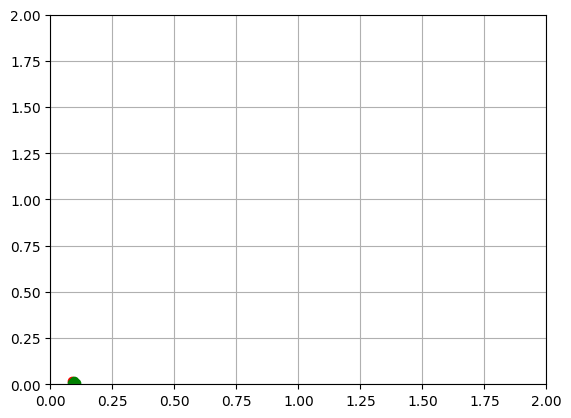

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
Accuracy:  71.42857142857143 TP:  4 TN:  1 FP:  0 FN:  2
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
True range of sight honest car
test!
here 2! True True
True rang

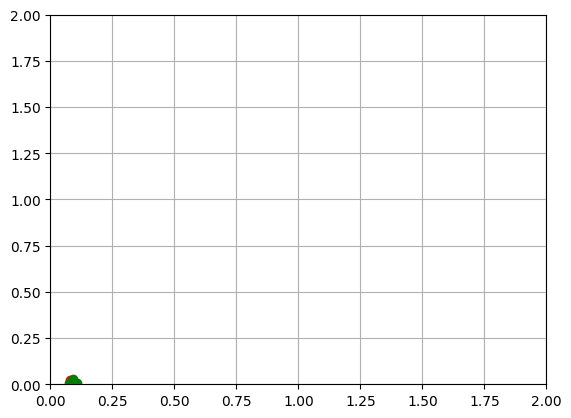

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 2
attestor has already been named 4
attestor has already been named 5
Accuracy:  57.14285714285714 TP:  4 TN:  0 FP:  1 FN:  2
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True


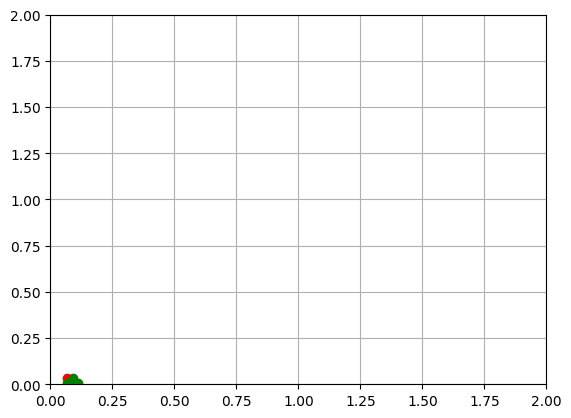

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
Accuracy:  57.14285714285714 TP:  3 TN:  1 FP:  0 FN:  3
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
True range of sight honest car
test!
here 2! True True
True rang

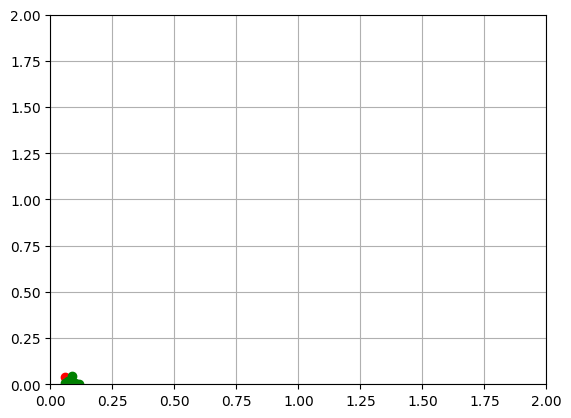

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
Accuracy:  57.14285714285714 TP:  3 TN:  1 FP:  0 FN:  3
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
True range of sight honest car
te

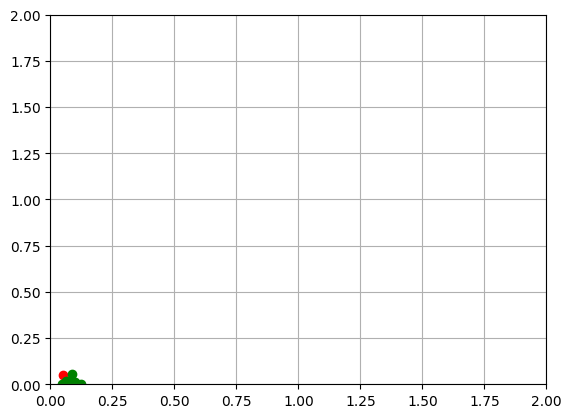

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
Accuracy:  28.57142857142857 TP:  2 TN:  0 FP:  1 FN:  4
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
False range of sight honest car
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 

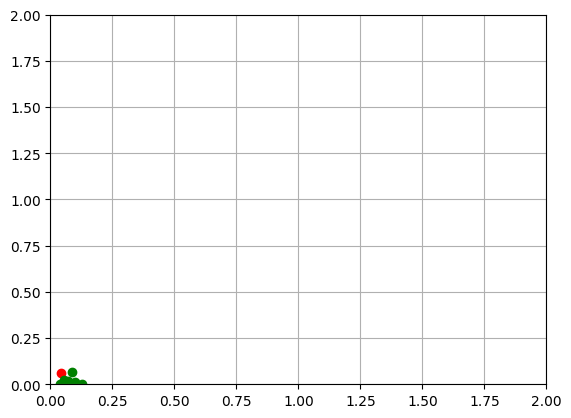

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
Accuracy:  71.42857142857143 TP:  4 TN:  1 FP:  0 FN:  2
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
False range of sight honest car
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True


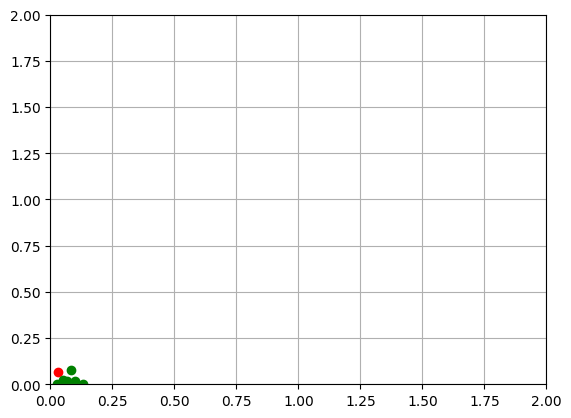

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
Accuracy:  28.57142857142857 TP:  2 TN:  0 FP:  1 FN:  4
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
False range of sight honest car
True range of sight honest car
test!
here 2! True True
True ran

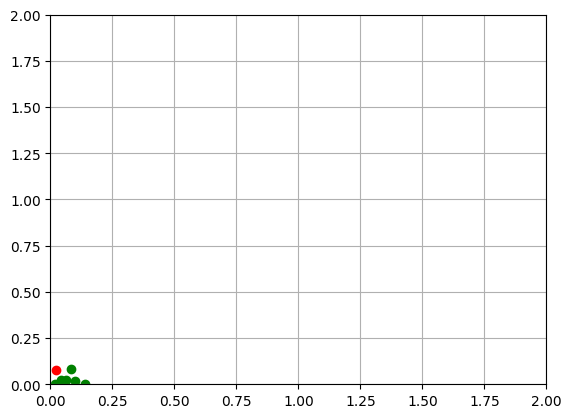

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
attestor has already been named 5
Accuracy:  42.857142857142854 TP:  3 TN:  0 FP:  1 FN:  3
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of sight honest car
False range of sight honest car
True range of sight honest car
test!
here 2! True True

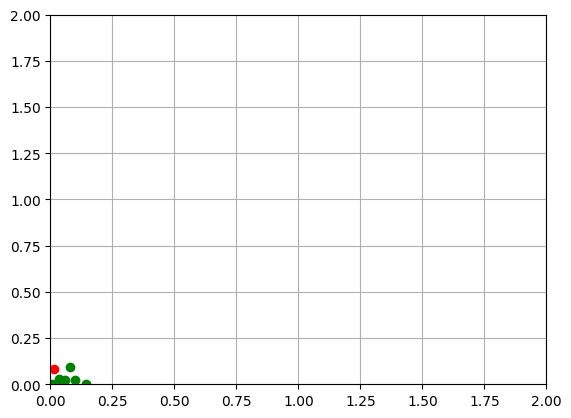

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
attestor has already been named 5
Accuracy:  28.57142857142857 TP:  1 TN:  1 FP:  0 FN:  5
number of lying cars in that cluster:  1
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of sight honest car
False range of sight honest car
True range of sigh

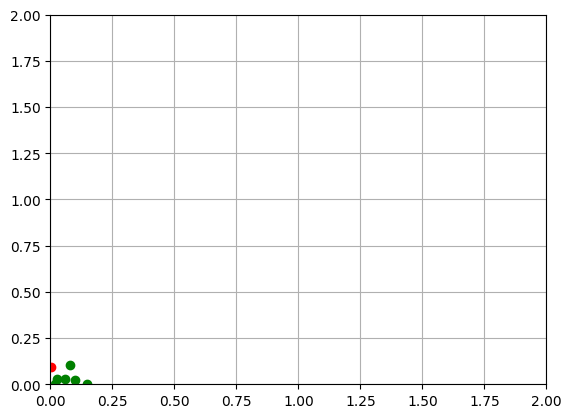

{<car_class.Car object at 0x15727fac0>, <car_class.Car object at 0x15727fb20>, <car_class.Car object at 0x15727fb50>, <car_class.Car object at 0x15727fb80>, <car_class.lying_car object at 0x1571041c0>, <car_class.Car object at 0x15727fbe0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
attestor has already been named 5
Accuracy:  57.14285714285714 TP:  3 TN:  1 FP:  0 FN:  3
number of lying cars in that cluster:  1
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here

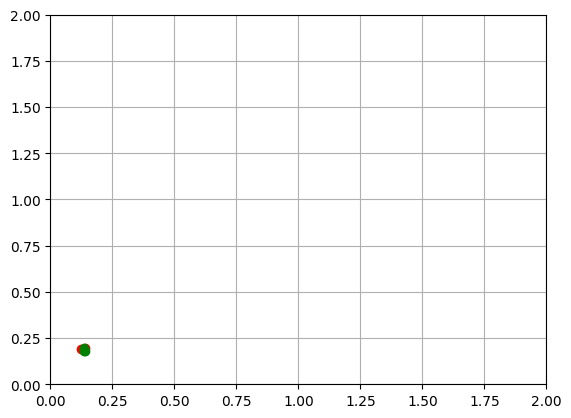

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
witness has already been named
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
witness has already been named
Accuracy:  28.57142857142857 TP:  1 TN:  1 FP:  1 FN:  4
number of lying cars in that cluster:  2
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False F

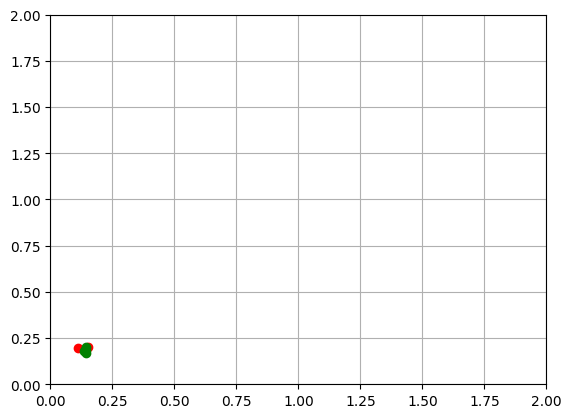

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
witness has already been named
attestor has already been named 4
attestor has already been named 4
Accuracy:  57.14285714285714 TP:  3 TN:  1 FP:  1 FN:  2
number of lying cars in that cluster:  2
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearb

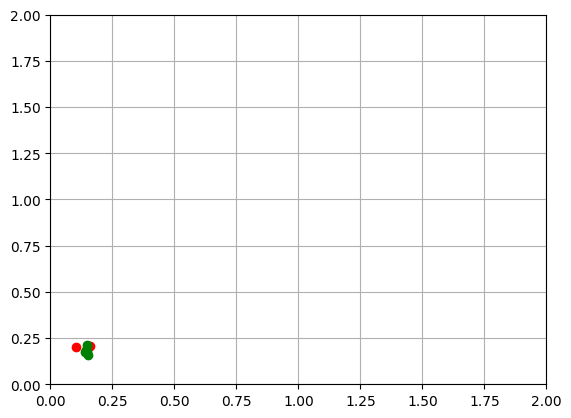

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
witness has already been named
Accuracy:  42.857142857142854 TP:  3 TN:  0 FP:  2 FN:  2
number of lying cars in that cluster:  2
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range 

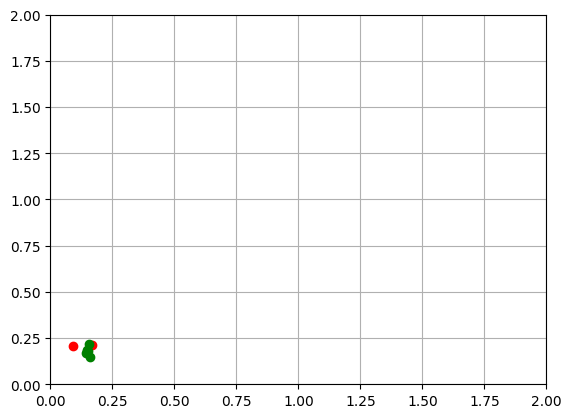

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
witness has already been named
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
Accuracy:  42.857142857142854 TP:  3 TN:  0 FP:  2 FN:  2
number of lying cars in that cluster:  2
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_inde

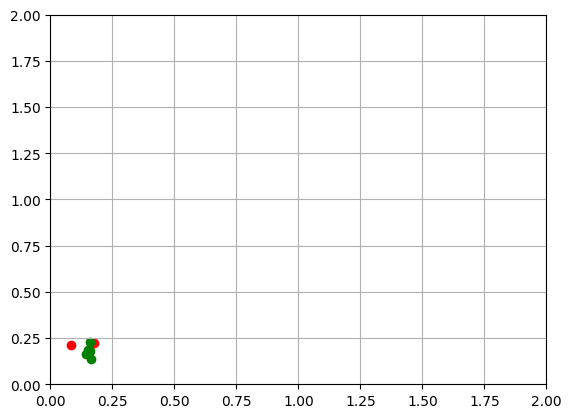

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 4
Accuracy:  28.57142857142857 TP:  1 TN:  1 FP:  1 FN:  4
number of lying cars in that cluster:  2
condition of alleged_nearby_car.honest == False
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
condition of alleged_nearby_car

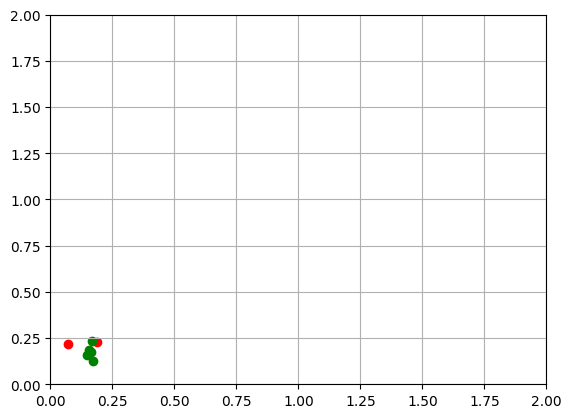

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
Accuracy:  42.857142857142854 TP:  2 TN:  1 FP:  1 FN:  3
number of lying cars in that cluster:  2
condition of alleged_nearby_car.honest == False
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of s

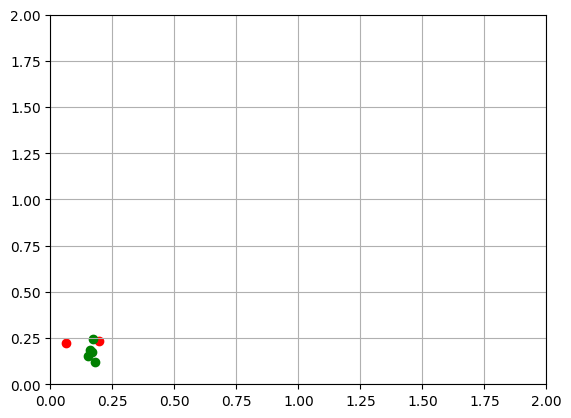

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
car has 0 witnesses False
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 4
attestor has already been named 4
Accuracy:  71.42857142857143 TP:  4 TN:  1 FP:  1 FN:  1
number of lying cars in that cluster:  2
False range of sight honest car
condition of alleged_nearby_car.honest == False
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of sight honest car
False range of sight honest car
False range of sight honest car
True range of sight honest car
co

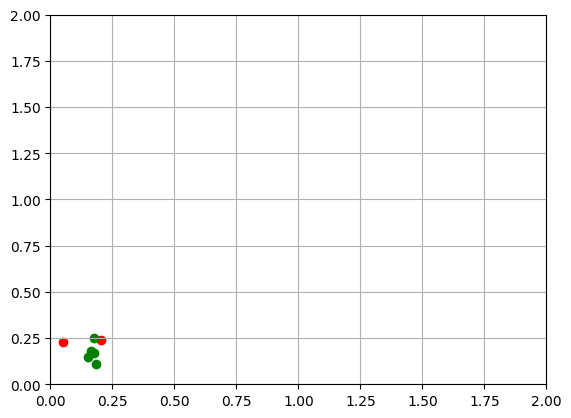

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
car has 0 witnesses False
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
Accuracy:  57.14285714285714 TP:  3 TN:  1 FP:  1 FN:  2
number of lying cars in that cluster:  2
False range of sight honest car
condition of alleged_nearby_car.honest == False
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of sight honest

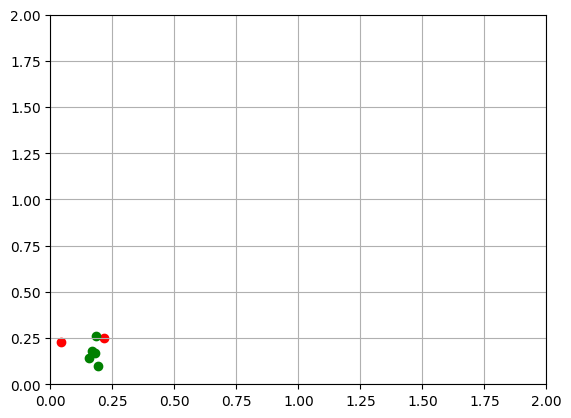

{<car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fca0>, <car_class.Car object at 0x15727fcd0>, <car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>}
car has 0 witnesses False
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  0 FN:  4
number of lying cars in that cluster:  2
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of sight honest car
False range of sight honest car
False rang

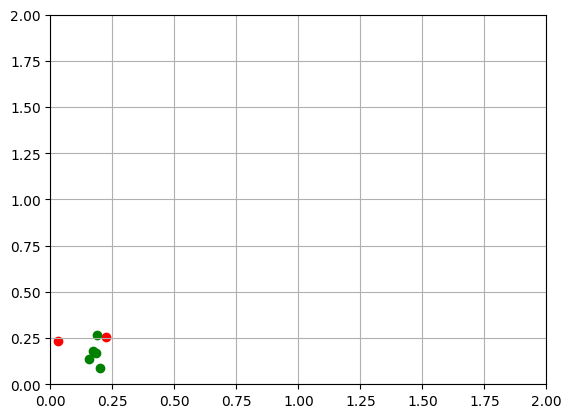

{<car_class.Car object at 0x15727fd00>, <car_class.Car object at 0x15727fd30>, <car_class.lying_car object at 0x15727fc40>, <car_class.Car object at 0x15727fcd0>}
car has 0 witnesses False
attestor has already been named 1
attestor has already been named 1
attestor has already been named 0
car has 0 witnesses True
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
Accuracy:  71.42857142857143 TP:  3 TN:  2 FP:  0 FN:  2
number of lying cars in that cluster:  2
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
2 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False

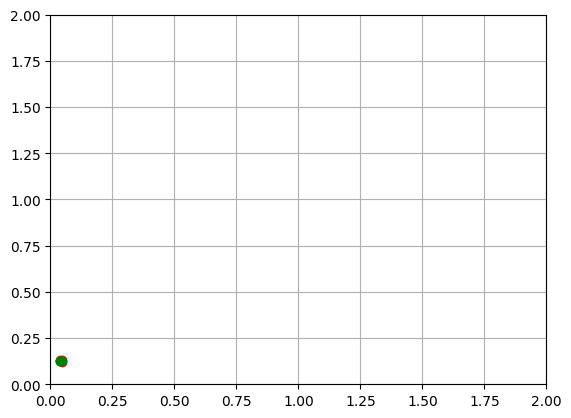

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
witness has already been named
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
Accuracy:  14.285714285714285 TP:  0 TN:  1 FP:  2 FN:  4
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_inde

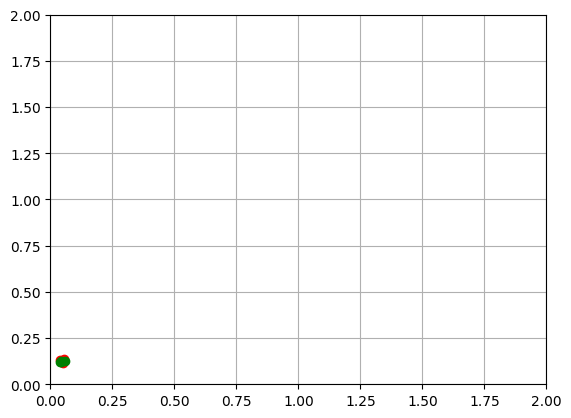

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
Accuracy:  14.285714285714285 TP:  1 TN:  0 FP:  3 FN:  3
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest c

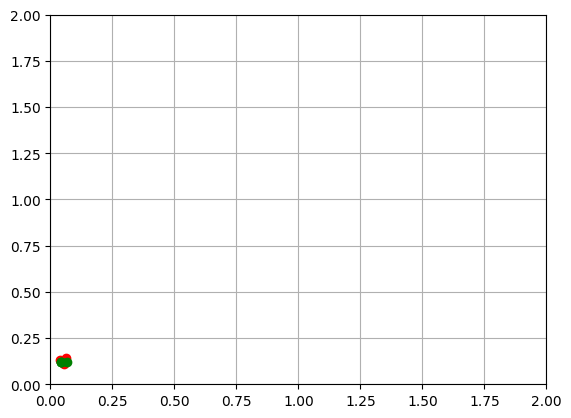

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
Accuracy:  71.42857142857143 TP:  2 TN:  3 FP:  0 FN:  2
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
te

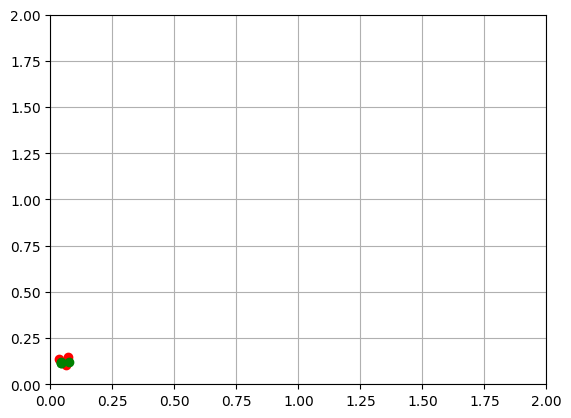

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
witness has already been named
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 2
attestor has already been named 3
Accuracy:  71.42857142857143 TP:  3 TN:  2 FP:  1 FN:  1
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
2

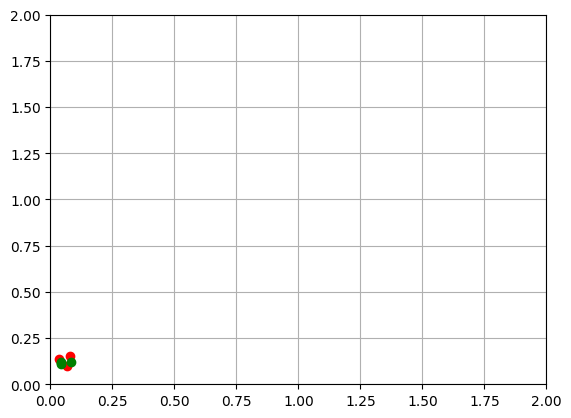

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
Accuracy:  85.71428571428571 TP:  3 TN:  3 FP:  0 FN:  1
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
condition

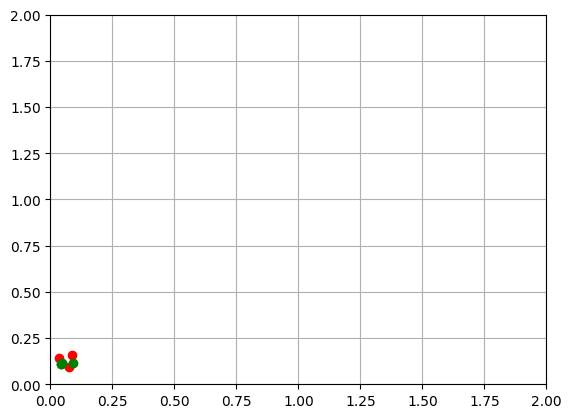

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
witness has already been named
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
Accuracy:  100.0 TP:  4 TN:  3 FP:  0 FN:  0
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
condition of alleged_nearby_car.honest == False
x == x

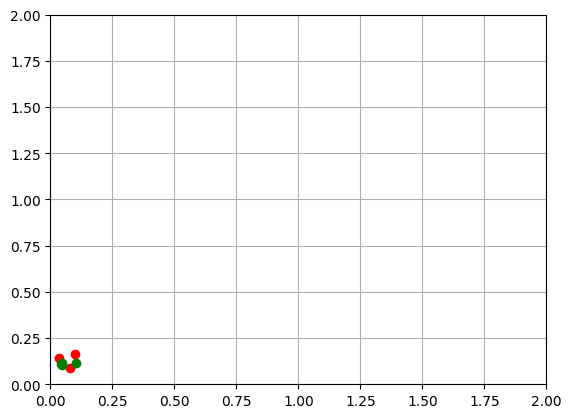

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
Accuracy:  42.857142857142854 TP:  0 TN:  3 FP:  0 FN:  4
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True Tru

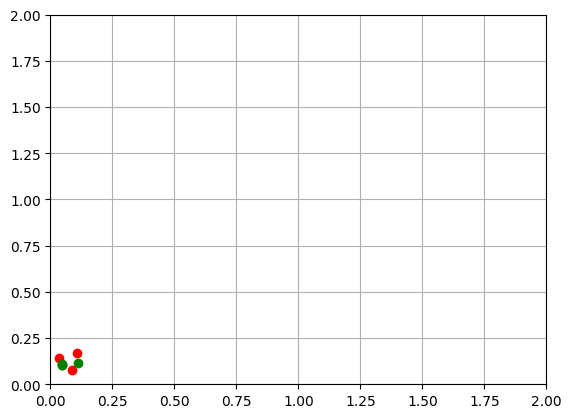

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
witness has already been named
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
witness has already been named
attestor has already been named 2
attestor has already been named 3
Accuracy:  57.14285714285714 TP:  2 TN:  2 FP:  1 FN:  2
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
True range of sight honest car
te

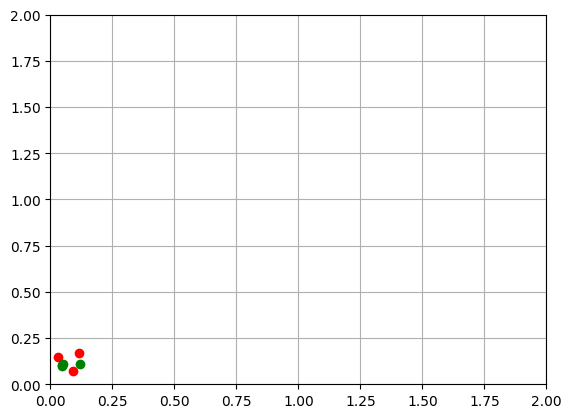

{<car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>, <car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fd60>, <car_class.lying_car object at 0x15727fd90>}
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
witness has already been named
Accuracy:  71.42857142857143 TP:  3 TN:  2 FP:  1 FN:  1
number of lying cars in that cluster:  3
True range of sight honest car
test!
here 2! True True
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
2 0
is nearby car in ROS: True is nearby car di

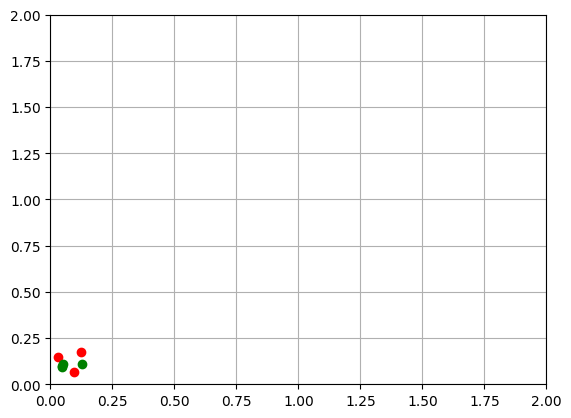

{<car_class.Car object at 0x15727fe80>, <car_class.Car object at 0x15727fe20>, <car_class.lying_car object at 0x15727fc70>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  1 FN:  3
number of lying cars in that cluster:  3
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in 

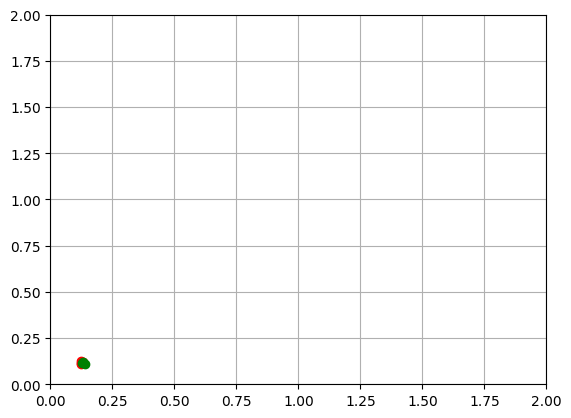

{<car_class.Car object at 0x15727feb0>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727ff40>, <car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 0
witness has already been named
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
Accuracy:  57.14285714285714 TP:  1 TN:  3 FP:  1 FN:  2
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of alleged_nearby_car.honest == False

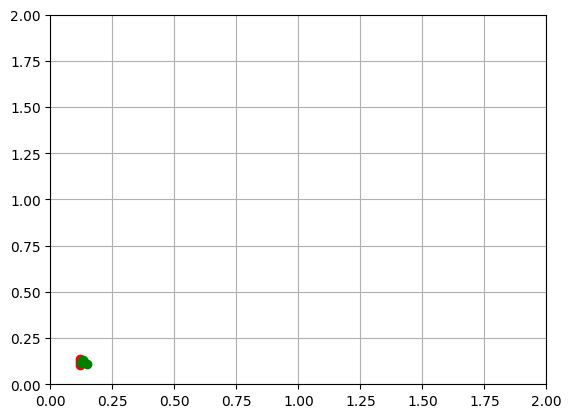

{<car_class.Car object at 0x15727feb0>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727ff40>, <car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
witness has already been named
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
Accuracy:  28.57142857142857 TP:  0 TN:  2 FP:  2 FN:  3
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of

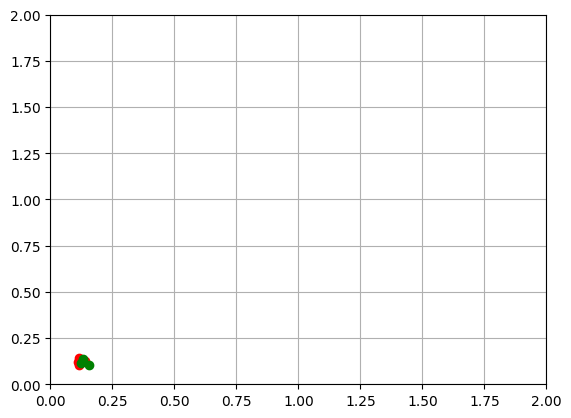

{<car_class.Car object at 0x15727feb0>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727ff40>, <car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
Accuracy:  28.57142857142857 TP:  0 TN:  2 FP:  2 FN:  3
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of alleged_nearby_car.honest == Fa

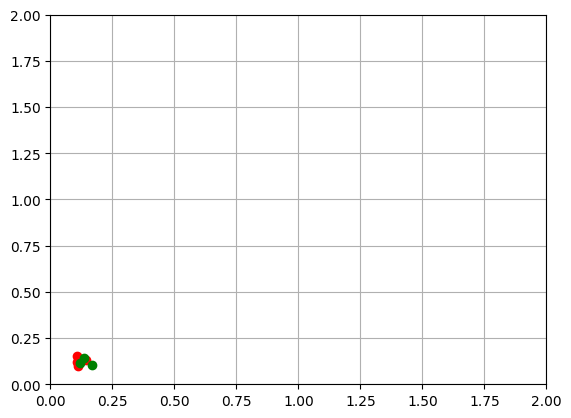

{<car_class.Car object at 0x15727feb0>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727ff40>, <car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
witness has already been named
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
Accuracy:  57.14285714285714 TP:  0 TN:  4 FP:  0 FN:  3
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == Fal

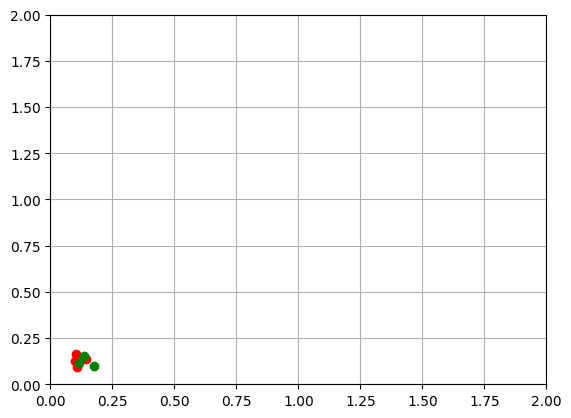

{<car_class.Car object at 0x15727feb0>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727ff40>, <car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
Accuracy:  57.14285714285714 TP:  1 TN:  3 FP:  1 FN:  2
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of all

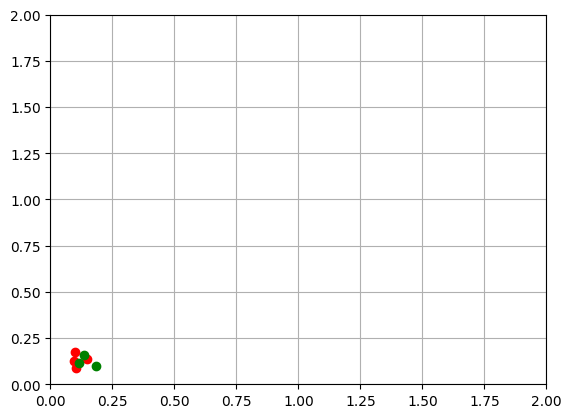

{<car_class.Car object at 0x15727feb0>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727ff40>, <car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
witness has already been named
attestor has already been named 3
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
Accuracy:  57.14285714285714 TP:  1 TN:  3 FP:  1 FN:  2
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0

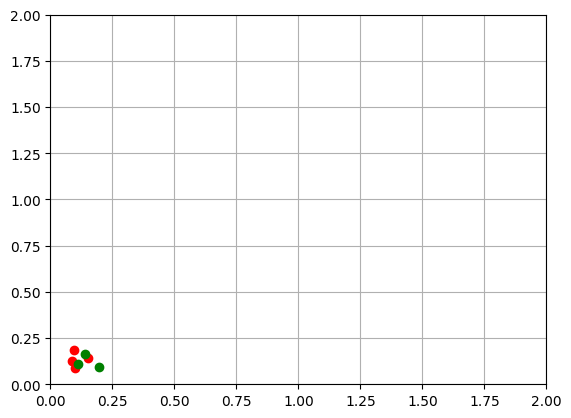

{<car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727ff40>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
witness has already been named
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  2 FN:  2
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of 

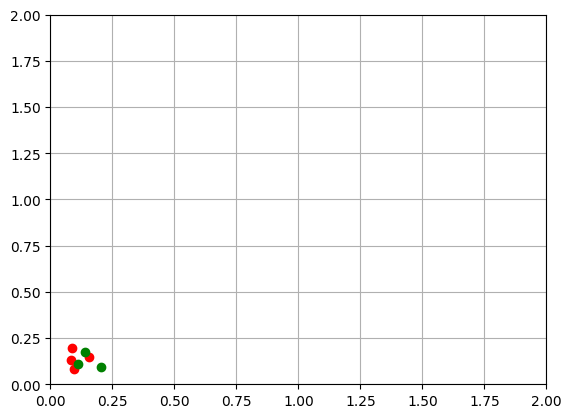

{<car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727ff40>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
car has 0 witnesses True
attestor has already been named 1
car witness has no attestors
attestor has already been named 2
witness has already been named
attestor has already been named 2
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  2 FN:  2
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == Fal

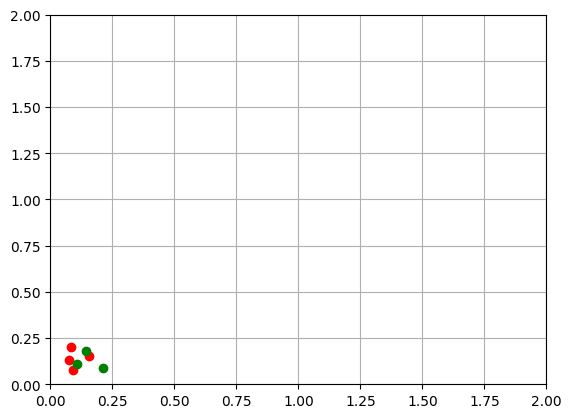

{<car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727ff40>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
car has 0 witnesses True
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
witness has already been named
attestor has already been named 2
Accuracy:  28.57142857142857 TP:  0 TN:  2 FP:  2 FN:  3
number of lying cars in that cluster:  4
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
0 0
True range of sight honest car
test!
here 2! True True
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index 

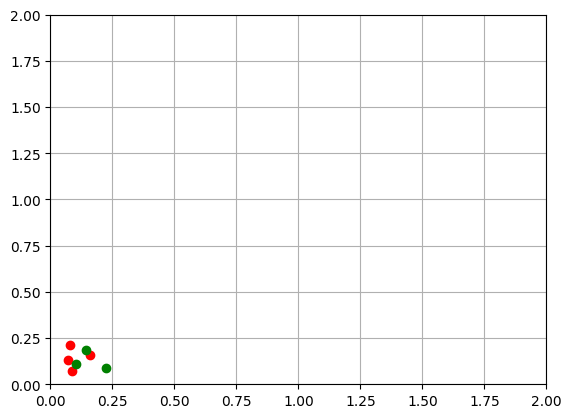

{<car_class.Car object at 0x15727ffa0>, <car_class.lying_car object at 0x15727ff40>, <car_class.lying_car object at 0x15727fee0>, <car_class.lying_car object at 0x15727fdf0>}
attestor has already been named 0
witness has already been named
attestor has already been named 1
witness has already been named
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 3
car has 0 witnesses True
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 2
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  2 FN:  2
number of lying cars in that cluster:  4
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y 

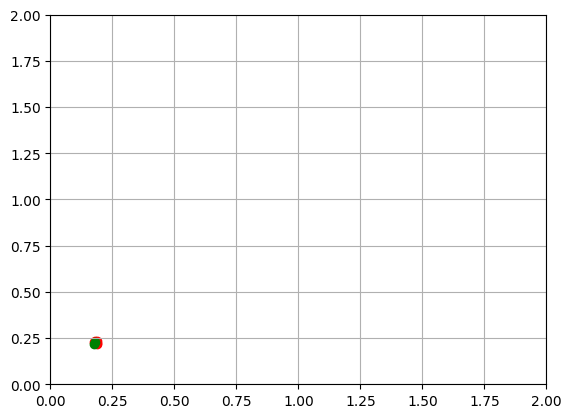

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>, <car_class.lying_car object at 0x15752a0d0>, <car_class.lying_car object at 0x15752a100>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15727ff70>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
Accuracy:  28.57142857142857 TP:  0 TN:  2 FP:  3 FN:  2
number of lying cars in that cluster:  5
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of a

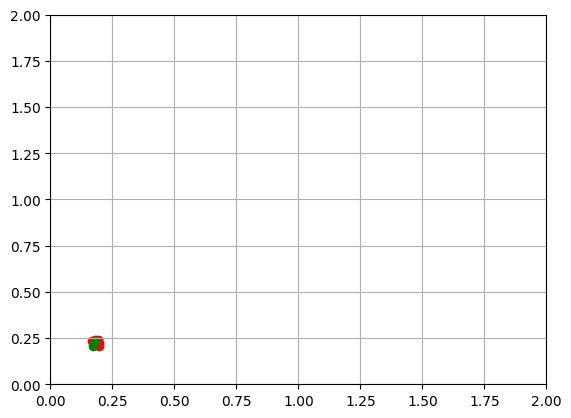

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>, <car_class.lying_car object at 0x15752a0d0>, <car_class.lying_car object at 0x15752a100>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15727ff70>}
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 3
attestor has already been named 3
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  3 FN:  1
number of lying cars in that cluster:  5
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: 

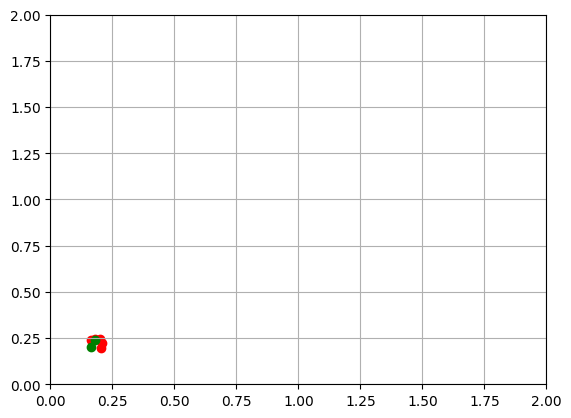

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>, <car_class.lying_car object at 0x15752a0d0>, <car_class.lying_car object at 0x15752a100>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15727ff70>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 4
witness has already been named
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
witness has already been named
Accuracy:  42.857142857142854 TP:  2 TN:  1 FP:  4 FN:  0
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
2 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == 

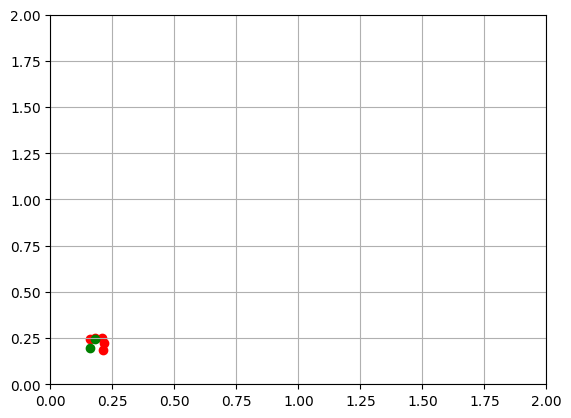

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>, <car_class.lying_car object at 0x15752a0d0>, <car_class.lying_car object at 0x15752a100>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15727ff70>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 3
witness has already been named
attestor has already been named 4
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
Accuracy:  28.57142857142857 TP:  0 TN:  2 FP:  3 FN:  2
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
2 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.hones

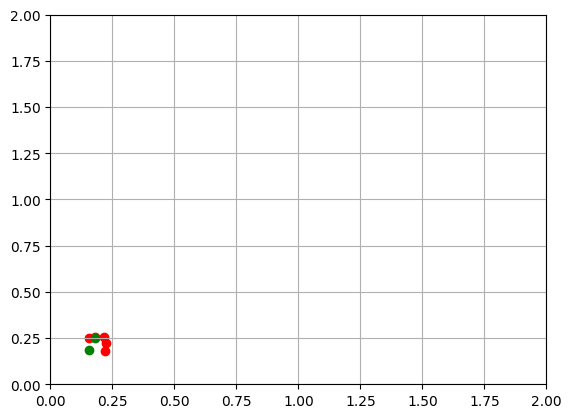

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>, <car_class.lying_car object at 0x15752a0d0>, <car_class.lying_car object at 0x15752a100>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15727ff70>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
witness has already been named
attestor has already been named 3
attestor has already been named 4
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
Accuracy:  42.857142857142854 TP:  1 TN:  2 FP:  3 FN:  1
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.h

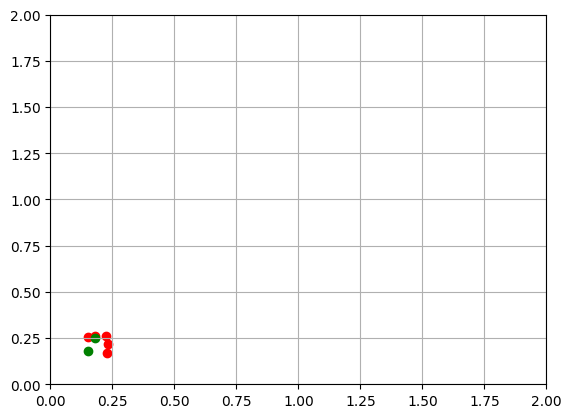

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>, <car_class.lying_car object at 0x15752a100>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15727ff70>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
witness has already been named
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
Accuracy:  57.14285714285714 TP:  1 TN:  3 FP:  2 FN:  1
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
True range of sight honest car
co

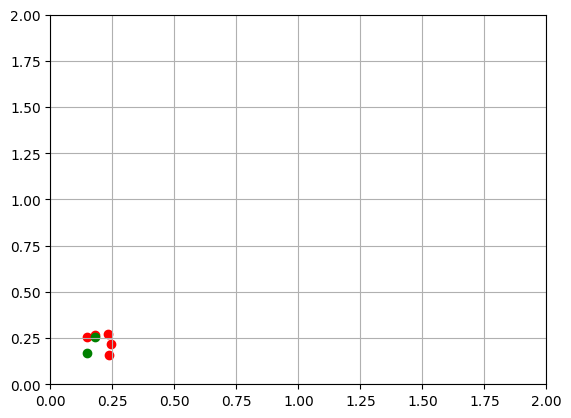

{<car_class.lying_car object at 0x15727ff70>, <car_class.Car object at 0x15752a040>, <car_class.Car object at 0x15752a160>, <car_class.lying_car object at 0x15752a070>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
witness has already been named
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 0
witness has already been named
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
Accuracy:  57.14285714285714 TP:  1 TN:  3 FP:  2 FN:  1
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
False range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
True range of sight honest car
condition of alleged_nearby_car.hone

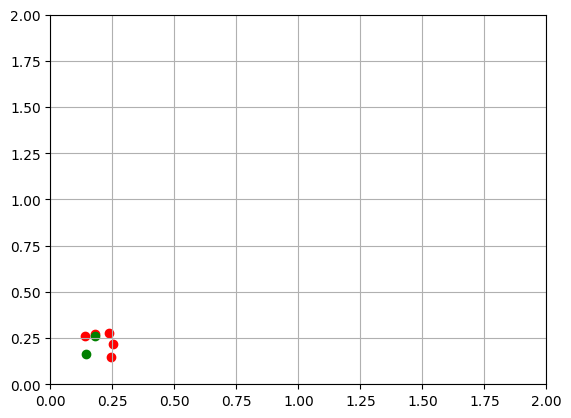

{<car_class.lying_car object at 0x15727ff70>, <car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
car has 0 witnesses False
car has 0 witnesses False
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
car has 0 witnesses True
Accuracy:  71.42857142857143 TP:  0 TN:  5 FP:  0 FN:  2
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
False range of sight honest car
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1

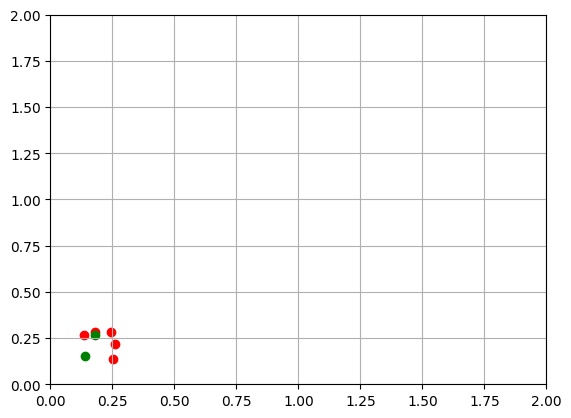

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>}
car has 0 witnesses False
attestor has already been named 1
car witness has no attestors
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
car has 0 witnesses False
car has 0 witnesses False
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
car has 0 witnesses True
Accuracy:  71.42857142857143 TP:  0 TN:  5 FP:  0 FN:  2
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
2 0
True range of sight honest car
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
1 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
is nearby car in ROS: True is nearby car diff ID True
here 1! 

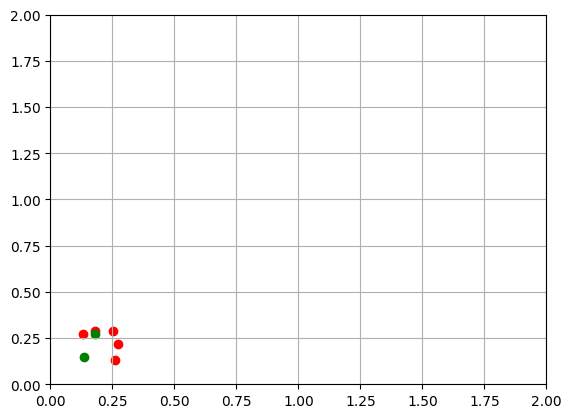

{<car_class.Car object at 0x15752a040>, <car_class.lying_car object at 0x15752a070>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
car has 0 witnesses False
attestor has already been named 4
car witness has no attestors
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
car has 0 witnesses True
Accuracy:  71.42857142857143 TP:  0 TN:  5 FP:  0 FN:  2
number of lying cars in that cluster:  5
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
is nearby

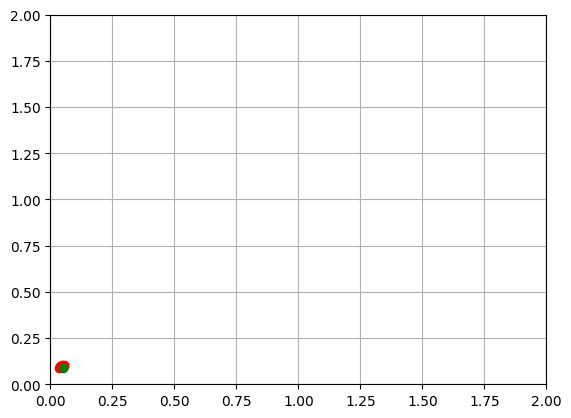

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
Accuracy:  28.57142857142857 TP:  1 TN:  1 FP:  5 FN:  0
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condi

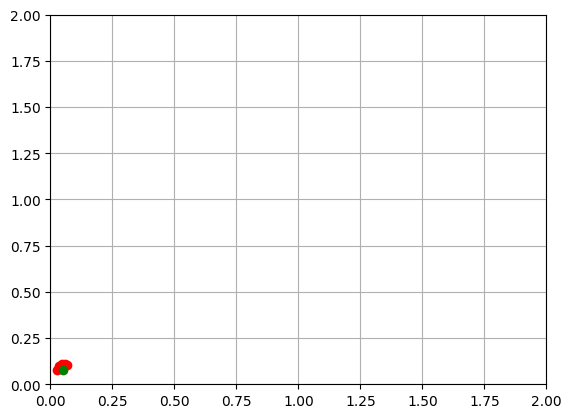

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 5
attestor has already been named 5
attestor has already been named 5
attestor has already been named 0
Accuracy:  28.57142857142857 TP:  0 TN:  2 FP:  4 FN:  1
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_inde

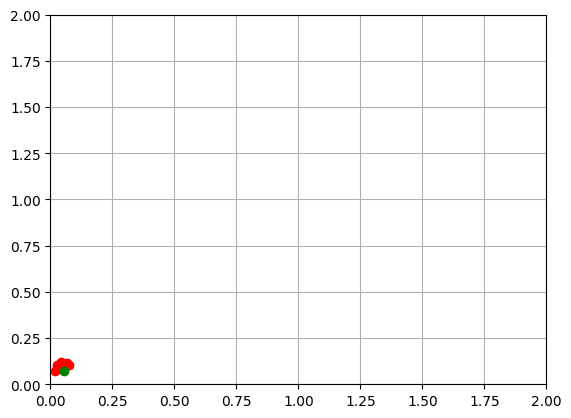

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 0
attestor has already been named 0
Accuracy:  14.285714285714285 TP:  0 TN:  1 FP:  5 FN:  1
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
is nearby car in ROS: True is nearby car dif

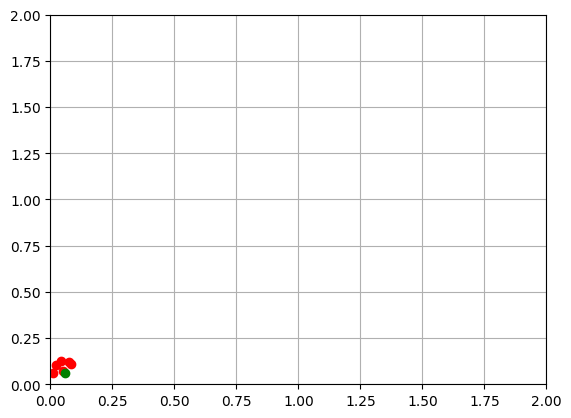

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 5
attestor has already been named 5
attestor has already been named 0
attestor has already been named 0
Accuracy:  28.57142857142857 TP:  1 TN:  1 FP:  5 FN:  0
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
condition of alleged_nearby_car.honest == Fal

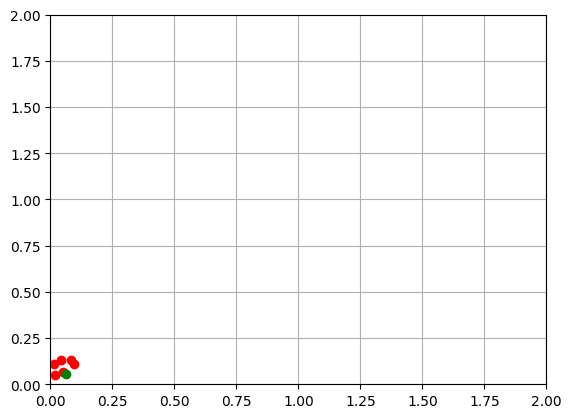

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 1
attestor has already been named 3
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
Accuracy:  14.285714285714285 TP:  0 TN:  1 FP:  5 FN:  1
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index


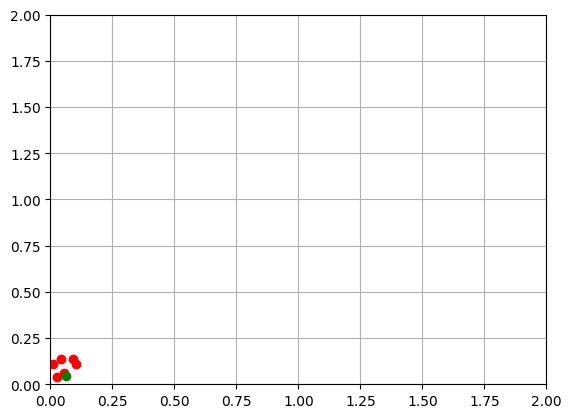

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 3
attestor has already been named 4
attestor has already been named 5
attestor has already been named 0
Accuracy:  57.14285714285714 TP:  1 TN:  3 FP:  3 FN:  0
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
5

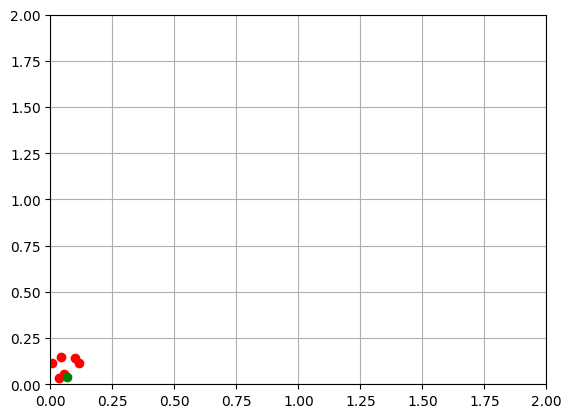

{<car_class.lying_car object at 0x15752a220>, <car_class.lying_car object at 0x15752a250>, <car_class.lying_car object at 0x15752a280>, <car_class.lying_car object at 0x15752a130>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>}
attestor has already been named 0
attestor has already been named 0
witness has already been named
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
witness has already been named
attestor has already been named 0
Accuracy:  28.57142857142857 TP:  1 TN:  1 FP:  5 FN:  0
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
condition of alleged_nearby_car.honest == False
x =

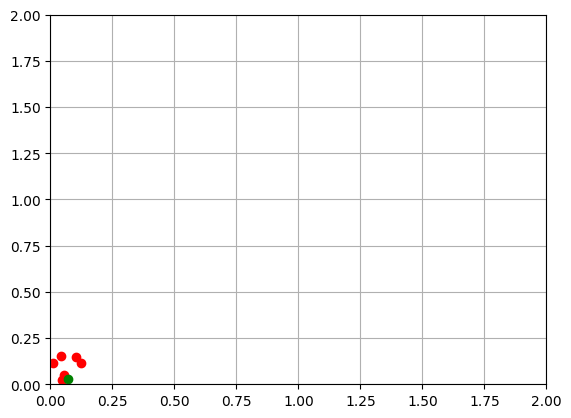

{<car_class.lying_car object at 0x15752a280>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a1c0>, <car_class.lying_car object at 0x15752a250>}
attestor has already been named 0
attestor has already been named 1
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 5
attestor has already been named 0
attestor has already been named 0
Accuracy:  71.42857142857143 TP:  1 TN:  4 FP:  2 FN:  0
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
condition of alleged_nearby_car.h

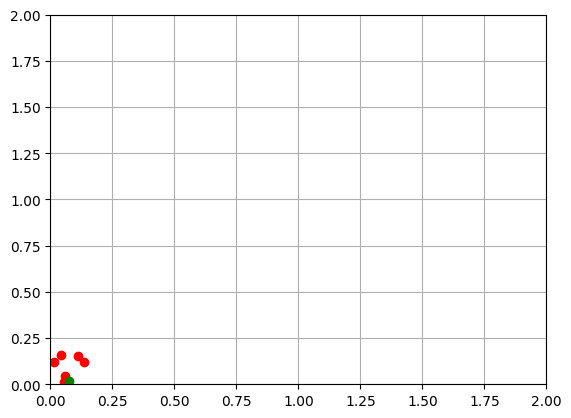

{<car_class.lying_car object at 0x15752a280>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a250>}
car witness has no attestors
attestor has already been named 0
car has 0 witnesses False
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
attestor has already been named 5
attestor has already been named 0
attestor has already been named 0
Accuracy:  57.14285714285714 TP:  0 TN:  4 FP:  2 FN:  1
number of lying cars in that cluster:  6
condition of alleged_nearby_car.honest == False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
3 0
is nearby car in ROS: True is nearby car diff ID True
here 1! False False
condition of alleged_nearby_car.honest == False
x == x_index and y == y_index
4 0
condition of alleged_ne

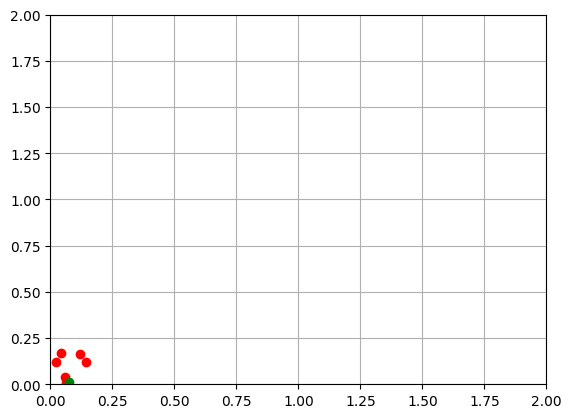

{<car_class.lying_car object at 0x15752a280>, <car_class.Car object at 0x15752a190>, <car_class.lying_car object at 0x15752a250>}
car witness has no attestors
attestor has already been named 0
car has 0 witnesses False
attestor has already been named 2
attestor has already been named 2
attestor has already been named 2
attestor has already been named 3
attestor has already been named 3
attestor has already been named 4
attestor has already been named 4
attestor has already been named 5
attestor has already been named 5
attestor has already been named 0
attestor has already been named 0
attestor has already been named 0
Accuracy:  85.71428571428571 TP:  0 TN:  6 FP:  0 FN:  1
number of lying cars in that cluster:  6
[[1, 0, 1, 1, 0, 1, 0, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1, 2, 2], [1, 0, 3, 2, 3, 3, 3, 2, 2, 2], [3, 2, 2, 4, 3, 3, 2, 2, 2, 2], [2, 2, 1, 2, 2, 3, 3, 5, 5, 5], [1, 2, 1, 1, 1, 3, 1, 4, 4, 6]]


In [5]:
list_cars = i.car_list_generator(1000, 0, 0)

cluster_size = 7

collaboratively_lying_car_clusters = []

for no_of_cars in range(1, cluster_size):

    cluster = [] 
    #print(no_of_cars)

    lying_cars = no_of_cars
    coerced_cars = cluster_size - no_of_cars

    cluster_cars_position = np.random.uniform(0, 0.25, size=(2)).tolist()
    #coerced cars position has to be in same positon

    collab_lying = i.lying_cars_init(lying_cars, cluster, cluster_cars_position)
    collab_coerced = i.coerced_cars_init(coerced_cars, cluster, cluster_cars_position)

    collaboratively_lying_car_clusters.append(cluster)


#collaborative_cluster = [item for sublist in collaborative_cluster for item in sublist]

#print(collaborative_cluster)




In [ ]:
total = []

for cluster in collaboratively_lying_car_clusters:
    
    lying_car_no = collaboratively_lying_car_clusters.index(cluster)

    data = []

    caught_liars = []

    for i in range(1):
        dt = 0.01
        all_cars = list_cars + cluster
        
        number_of_cars_in_cluster_caught = 0

        London = e.Environment([0,2], [0,2], 0.25)
        e.environment_update(cluster, dt, London)
        #e.environment_update(list_cars, dt, London)

        v.Visualise(cluster, London)
        print(cluster[2].neighbours)
        
        density = (London.width * London.height) / len(all_cars)

        #Load the PoL algoritm and feed it the initialised objects
        Accuracy, DAG, True_Positive, True_Negative, False_Positive, False_Negative = p.PoL(cluster)
        print('Accuracy: ', Accuracy, 'TP: ',True_Positive, 'TN: ',True_Negative, 'FP: ', False_Positive, 'FN: ', False_Negative)

        row = sim.parser(dt, 0, 0, 1000, density, Accuracy, True_Positive, True_Negative, False_Positive, False_Negative)
        
        data.append(row)
            
        simulation_df = pd.DataFrame(data, columns=['Simulation number', 'Percent of coerced cars', 'Percent of lying cars', 'Percent of honest cars', 'Density', 'Accuracy', 
        'True Positives', 'True Negatives', 'False Positives', 'False Negatives', 
        'Percent True Positives', 'Percent True Negatives', 'Percent False Positives','Percent False Negatives'])

        print('number of lying cars in that cluster: ',lying_car_no +1)
        for car in cluster:
            if car.algorithm_honesty_output == False and car.honest == False:
                
                number_of_cars_in_cluster_caught += 1
                

        caught_liars.append(number_of_cars_in_cluster_caught)
    total.append(caught_liars)


print(total)